In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# If k = 1, the classifier uses only the closest neighbor for prediction (can be sensitive to noise).
# If k is much larger than 3, predictions are based on more neighbors, which can smooth out noise but may ignore local patterns.

# Load built-in Iris dataset (offline)
iris = load_iris(as_frame=True)
df = iris.frame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Sample data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [

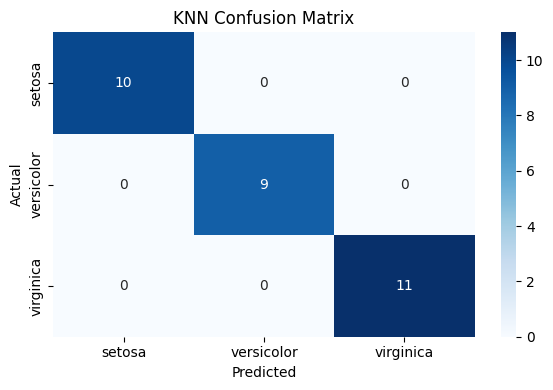

In [22]:
df = df.drop(columns="target")
print("Sample data:\n", df.head())

# Prepare features and labels
X = df.drop("species", axis=1)
y = df["species"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap = 'Blues',
			xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# KNN Classification: Step-by-Step Walkthrough 🚀
Let's break down the code and concepts in a way that's easy to follow and remember!
---
## 1. Import Libraries
- **pandas (pd):** For handling tabular data (DataFrame).
- **numpy (np):** For numerical operations.
- **matplotlib.pyplot (plt):** For plotting graphs.
- **scikit-learn modules:**
    - `load_iris`: Loads the famous Iris dataset.
    - `train_test_split`: Splits data into training/testing sets.
    - `StandardScaler`: Standardizes features (mean=0, variance=1).
    - `KNeighborsClassifier`: Implements the KNN algorithm.
    - `classification_report`, `confusion_matrix`: Evaluation metrics.
---
## 2. Load and Prepare the Data
- **Load the Iris dataset as a DataFrame:**
    ```python
    iris = load_iris(as_frame=True)
    df = iris.frame
    ```
- **Map numeric targets to species names:**
    ```python
    df["species"] = df["target"].map(dict(enumerate(iris.target_names)))
    df = df.drop(columns="target")
    ```
- **Preview the data:**
    ```python
    print("Sample data:\n", df.head())
    ```
---
## 3. Feature & Label Preparation
- **Features (`X`):** All columns except 'species'.
- **Labels (`y`):** The 'species' column.
    ```python
    X = df.drop("species", axis=1)
    y = df["species"]
    ```
---
## 4. Train/Test Split
- **Split into 80% training and 20% testing:**
    ```python
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    ```
- `random_state=42` ensures reproducibility.
---
## 5. Feature Scaling (Normalization)
- **Why scale?** KNN is distance-based, so features should be on the same scale.
- **Fit scaler on training data, transform both sets:**
    ```python
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    ```
---
## 6. Train the KNN Model
- **Create and train the classifier:**
    ```python
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_scaled, y_train)
    ```
---
## 7. Predict & Evaluate
- **Make predictions and print evaluation metrics:**
    ```python
    y_pred = knn.predict(X_test_scaled)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    ```
---
## 8. Visualize the Confusion Matrix
- **Use seaborn heatmap for a clear, colored table:**
    ```python
    import seaborn as sns
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues',
                xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.title("KNN Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    ```
---
## 💡 Quick Tips & Insights
- **Why do we scale features before KNN?**
    - Because KNN uses distance calculations, and unscaled features can distort results!
- **What does `axis=1` mean in `df.drop`?**
    - It tells pandas to drop a column (not a row).
- **What do the parameters in `sns.heatmap` do?**
    - `annot=True`: Shows numbers in each cell.
    - `fmt="d"`: Formats as integers.
    - `cmap='Blues'`: Blue color gradient.
    - `xticklabels`, `yticklabels`: Class names for axes.
---
✅ That's the full breakdown! If you have more questions, just ask!

# Making Sense of the Classification Report (Beginner-Friendly)
---
## Imagine a Fruit Sorter 🍎🍌🍇
Suppose you have a machine that sorts apples, bananas, and grapes. You want to know:
- How often does it call something an apple when it really is an apple? (Precision)
- How many real apples did it find out of all the apples you gave it? (Recall)
- How well does it balance both? (F1-score)
- How many apples, bananas, and grapes did you actually have? (Support)
---
## What Each Term Means
- **Precision:** If the machine says “apple” 10 times, and 8 are really apples, precision = 8/10 = 0.8.
    - "Of all things called apple, how many were truly apple?"
- **Recall:** If you gave the machine 12 apples, and it found 8, recall = 8/12 = 0.67.
    - "Of all real apples, how many did it find?"
- **F1-score:** Combines precision and recall. If both are high, F1 is high. If one is low, F1 drops.
    - "How good is the machine at not missing apples and not making mistakes?"
- **Support:** How many of each fruit did you actually have?
    - "How many apples, bananas, grapes in your test set?"
---
## Why Only One Accuracy Value?
- **Accuracy** is the overall score:
    - "Out of all fruits, how many did the machine sort correctly?"
    - Only one value because it’s for the whole test set, not per fruit.
- **Macro avg:** Average of precision, recall, F1 for all fruits (treats each fruit equally).
- **Weighted avg:** Like macro avg, but gives more weight to fruits you had more of.
---
## Example Table (Fruit Sorter)
| Fruit      | Precision | Recall | F1-score | Support |
|------------|-----------|--------|----------|---------|
| Apple      |   0.80    |  0.67  |   0.73   |   12    |
| Banana     |   0.90    |  0.90  |   0.90   |   10    |
| Grape      |   1.00    |  0.90  |   0.95   |   10    |
| accuracy   |           |        |   0.85   |   32    |
| macro avg  |   0.90    |  0.82  |   0.86   |   32    |
| weighted avg| 0.88     |  0.85  |   0.86   |   32    |
---
## In Short
- Precision: "How careful is the machine when it says a fruit is apple?"
- Recall: "How good is it at finding all apples?"
- F1-score: "How well does it balance both?"
- Support: "How many of each fruit did you test?"
- Accuracy: "How many fruits did it sort correctly overall?"
- Macro/Weighted avg: "How do the scores look on average?"
---
If you want to see this with your own data, just look at the numbers for each class in your report!